<a href="https://colab.research.google.com/github/rsthakur8815/CV-Assignment/blob/main/Heart_Diease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [ ]:
# https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
df  = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [ ]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
# Assuming df is your DataFrame
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

attribute_list = df.columns.tolist()
attribute_list.remove('Heart Disease')

print("Outliers: \n")
for item in attribute_list:
    outlier_indices = outliers_iqr(df[item])
    print(item, ': ', outlier_indices)

Outliers: 

Age :  (array([], dtype=int64),)
Sex :  (array([], dtype=int64),)
Chest pain type :  (array([ 13,  18,  19,  37,  63,  64,  85,  87, 118, 143, 158, 160, 169,
       170, 174, 198, 205, 210, 228, 229]),)
BP :  (array([ 58,  87, 110, 117, 144, 159, 165, 240, 265]),)
Cholesterol :  (array([  1,   9,  52, 181, 188]),)
FBS over 120 :  (array([  6,  17,  24,  29,  35,  43,  44,  45,  51,  52,  57,  60,  64,
        67,  86, 103, 113, 117, 119, 129, 137, 159, 167, 169, 170, 175,
       178, 180, 184, 187, 194, 205, 211, 223, 227, 228, 240, 254, 256,
       265]),)
EKG results :  (array([], dtype=int64),)
Max HR :  (array([101]),)
Exercise angina :  (array([], dtype=int64),)
ST depression :  (array([ 87, 156, 176, 235]),)
Slope of ST :  (array([], dtype=int64),)
Number of vessels fluro :  (array([  0,   9,  46,  48,  49,  75, 103, 120, 171, 175, 176, 184, 187,
       199, 213, 223, 234, 235, 269]),)
Thallium :  (array([], dtype=int64),)


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Absence','Presence']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

def report_performance(model,X_test):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model,X_test,y_test):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

In [ ]:
# Step 1: Split the data into features (X) and labels (y)
# Step 1: Train Neural Network (NN)
X = df.drop('Heart Disease', axis=1) # Features for NN
y = df['Heart Disease']  # Target for NN

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 3: Standardize the features (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
range_of_pca = 13
network_128 = 128
network_64 = 64


for i in range(13):
  pca = PCA(n_components=i+1)  # Choose the number of components you want to keep
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)

  mlp_model = MLPClassifier(hidden_layer_sizes=(network_128,),alpha=0.01,random_state=42)  # Adjust architecture as needed
  mlp_model.fit(X_train_pca, y_train)

  y_pred = mlp_model.predict(X_test_pca)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'MLP Model Accuracy with PCA when n= {i+1} with network: {accuracy}')

MLP Model Accuracy with PCA when n= 1 with network: 0.8382352941176471
MLP Model Accuracy with PCA when n= 2 with network: 0.8529411764705882
MLP Model Accuracy with PCA when n= 3 with network: 0.8676470588235294
MLP Model Accuracy with PCA when n= 4 with network: 0.8676470588235294
MLP Model Accuracy with PCA when n= 5 with network: 0.8823529411764706
MLP Model Accuracy with PCA when n= 6 with network: 0.8970588235294118
MLP Model Accuracy with PCA when n= 7 with network: 0.8970588235294118
MLP Model Accuracy with PCA when n= 8 with network: 0.8970588235294118
MLP Model Accuracy with PCA when n= 9 with network: 0.8676470588235294


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model Accuracy with PCA when n= 10 with network: 0.8529411764705882
MLP Model Accuracy with PCA when n= 11 with network: 0.8676470588235294


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Model Accuracy with PCA when n= 12 with network: 0.8823529411764706
MLP Model Accuracy with PCA when n= 13 with network: 0.8970588235294118


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#  Step 4: Apply PCA to reduce dimensionality
pca = PCA(n_components=5)  # 5 gives the best accuracy in mlp model
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Train MLP on the PCA-transformed features
mlp_model = MLPClassifier(hidden_layer_sizes=(128,128),alpha=0.01,random_state=42)  # Adjust architecture as needed
mlp_model.fit(X_train_pca, y_train)

y_pred = mlp_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'MLP Model Accuracy with PCA: {accuracy}')


MLP Model Accuracy with PCA: 0.8970588235294118




Confusion Matrix:
[[40  0]
 [ 7 21]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.75      0.86        28

    accuracy                           0.90        68
   macro avg       0.93      0.88      0.89        68
weighted avg       0.91      0.90      0.89        68



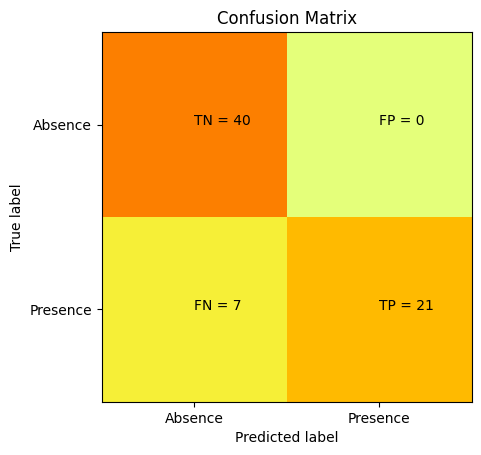

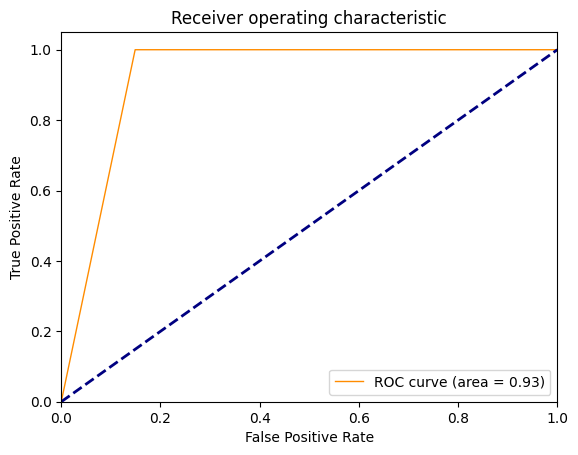

In [ ]:
report_performance(mlp_model,X_test_pca)
roc_curves(mlp_model,X_test_pca,y_test)

In [ ]:
# Step 5: Extract NN outputs
nn_outputs_train = mlp_model.predict_proba(X_train_pca)
nn_outputs_test = mlp_model.predict_proba(X_test_pca)

# Step 6: Combine features
X_combined_train = np.concatenate((X_train.values, nn_outputs_train), axis=1)
X_combined_test = np.concatenate((X_test.values, nn_outputs_test), axis=1)

In [ ]:
# for i in range(15):
#   pca = PCA(n_components=i+1)  # Choose the number of components you want to keep
#   X_train_lr1 = pca.fit_transform(X_combined_train)
#   X_test_lr1 = pca.transform(X_combined_test)

#   lr_model1 = LogisticRegression(C=0.3,random_state=42)
#   lr_model1.fit(X_train_lr1, y_train)

#   y_pred = lr_model1.predict(X_test_lr1)
#   accuracy_lr = accuracy_score(y_test, y_pred)
#   print(f'Logistic Regression Model Accuracy {i+1}: {accuracy_lr}')


In [ ]:
# Step 7: Train LR on combined features
lr_model = LogisticRegression(C=0.3,random_state=42)
lr_model.fit(X_combined_train, y_train)

# Step 8: Predict and evaluate
y_pred = lr_model.predict(X_combined_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {accuracy_lr}')

Logistic Regression Model Accuracy: 0.9264705882352942


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[40  0]
 [ 5 23]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        40
           1       1.00      0.82      0.90        28

    accuracy                           0.93        68
   macro avg       0.94      0.91      0.92        68
weighted avg       0.93      0.93      0.93        68



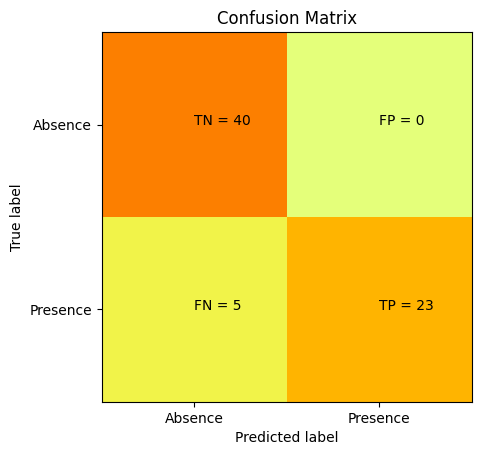

In [ ]:
report_performance(lr_model,X_combined_test)

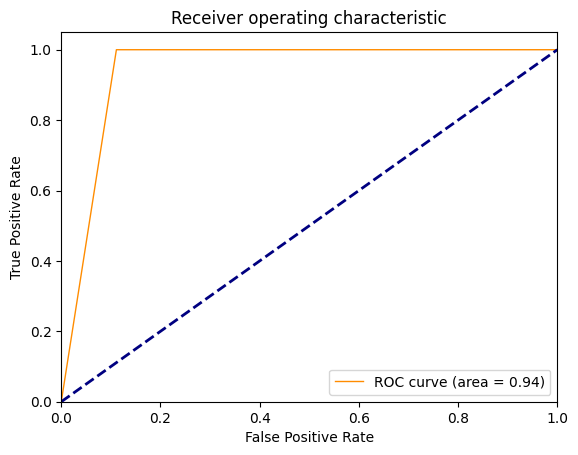

In [ ]:
roc_curves(lr_model,X_combined_test,y_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def predict_custom_test(custom_test_df, scaler, pca, mlp_model, lr_model):
    # Step 1: Extract features from the custom test dataset
    X_custom_test = custom_test_df.drop('Heart Disease', axis=1)

    # Step 2: Standardize the features (using the same scaler from training)
    X_custom_test_scaled = scaler.transform(X_custom_test)  # Use the same scaler from training

    # Step 3: Apply PCA to reduce dimensionality (using the same PCA from training)
    X_custom_test_pca = pca.transform(X_custom_test_scaled)  # Use the same PCA from training

    # Step 4: Predict using the trained MLP model
    mlp_outputs_custom_test = mlp_model.predict_proba(X_custom_test_pca)

    # Step 5: Combine features for Logistic Regression
    X_combined_custom_test = np.concatenate((X_custom_test.values, mlp_outputs_custom_test), axis=1)

    # Step 7: Predict using the trained Logistic Regression model
    y_pred_custom_test = lr_model.predict(X_combined_custom_test)

    return y_pred_custom_test

# Example Input
example_custom_test_data = {
    'Age': [60, 55, 40],
    'Sex': [1, 0, 1],
    'Chest pain type': [3, 2, 1],
    'BP': [140, 130, 120],  # Include other features accordingly
    'Cholesterol': [260, 300, 200 ],
    'FBS over 120': [0, 1, 0],
    'EKG results': [1, 0, 2],
    'Max HR': [150, 160, 140],
    'Exercise angina': [1, 0, 1],
    'ST depression': [2.0, 1.5, 0.5],
    'Slope of ST': [2, 1, 2],
    'Number of vessels fluro': [3, 0, 1],
    'Thallium': [3, 7, 7],
    'Heart Disease': [1, 0, 1],  # Target column for prediction
}

example_custom_test_df = pd.DataFrame(example_custom_test_data)

# Predict using the function
predictions = predict_custom_test(example_custom_test_df, scaler, pca, mlp_model, lr_model)

# Display the predictions
print("Predictions on Example Custom Test Dataset:")
print(predictions)


Predictions on Example Custom Test Dataset:
[1 0 1]
